In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

np.set_printoptions(precision=4, linewidth=100)

## Objective

- We want to study the score in a exam on the basis of study time.

    $y = m \cdot x + c$

- Our Data points are: ($x_i, y_i$)
- The predicted data point for a given $x$ will be $\hat{y}_i$.

- Mean squared error function:

    $E = \frac{1}{n} \cdot \sum_{i=0}^n (y_i- \hat{y}_i)^2 = \frac{1}{n} \cdot \sum_{i=0}^n (y_i- (m\cdot x_i + b))^2$

- We need to calculate $m$ and $b$ by minimizing the function $E$. We can calculate the di=erivative wrt $m$ and $b$ and set it to zero.
    
    $\frac{\partial E}{\partial m} = - \frac{2}{n} \cdot \sum_{i=0}^n x_i (y_i- (m\cdot x_i + b))$

    $\frac{\partial E}{\partial m} = - \frac{1}{n} \cdot \sum_{i=0}^n (y_i- (m\cdot x_i + b))$

    If we want to improve $m$ and $b$ then all we need to do is  with each itteration we say take the current values of $m$ and assign it to following equations respectively:

    New $m$ and new $b$ will be written in terms of current $m$ and current $b$, and the the direction of the steepest ascent $\partial E/\partial (a ~{\rm or}~ m)$ as: 
    
    $m = m -\alpha \cdot \frac{\partial E}{\partial m}$ 
    
    $b = m -\alpha \cdot \frac{\partial E}{\partial b}$ 

    where $\alpha$ is a learning rate.


Generating a random dataset with a column of 'Study time' and 'Score'.

In [2]:
# Generating the dataset for a Study time and Score in a exam

# Set the seed for reproducibility (optional)
np.random.seed(42)

# Generate study time (in hours)
study_time = np.random.uniform(low=0.5, high=4.0, size=100)

# Generate scores
score = 70 + 10 * study_time + np.random.normal(loc=0, scale=5, size=100)

# Print the first 10 data points
for i in range(10):
    print(f"Study Time: {study_time[i]:.2f} hours, Score: {score[i]:.2f}")


Study Time: 1.81 hours, Score: 88.54
Study Time: 3.83 hours, Score: 106.78
Study Time: 3.06 hours, Score: 101.08
Study Time: 2.60 hours, Score: 86.02
Study Time: 1.05 hours, Score: 79.36
Study Time: 1.05 hours, Score: 82.25
Study Time: 0.70 hours, Score: 84.42
Study Time: 3.53 hours, Score: 102.72
Study Time: 2.60 hours, Score: 92.00
Study Time: 2.98 hours, Score: 97.27


In [6]:
# Create a DataFrame from the generated data
df = pd.DataFrame({'studytime': study_time, 'Score': score})# study time in hours

# Save the DataFrame to a CSV file
df.to_csv('Study-dataset.csv', index=False)

# Load the CSV file into a DataFrame
data_df = pd.read_csv('Study-dataset.csv')

# Display the loaded DataFrame
print(data_df.head())


   studytime       Score
0   1.810890   88.544140
1   3.827500  106.779964
2   3.061979  101.078592
3   2.595305   86.015202
4   1.046065   79.362293


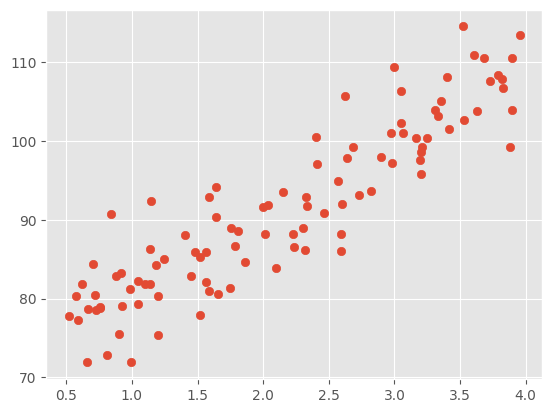

In [8]:
plt.scatter(data_df.studytime, data_df.Score )
plt.show()

In [ ]:
def loss_function(m,b, points):
    